
1 **Aufgabe Standardisierung** 

Erzeugt aus der Datei  data.xlsx  ein DataFrame. Es handelt sich um eine Excel Datei.Dafür benögen wir die Bibliothek  openpyxl. 
Bennent die Spalte mit den Werten in  Sample Data  um.

Erzeugt mit  seaborn.histplot  eine Darstellung der Daten inklusive der geschätzten Dichtefunkon (kde).

Die Daten sollen dann standardisiert werden indem ihr folgende Formel daraufanwendet:
 
 Erzeugt erneut ein  seaborn.histplot  für die standardisierten Daten.
 
 Erzeugt außerdem ein  seaborn.kdeplot  mit der geschätzten Dichtefunkon derstandardisierten Daten . 
 
 In dieser Darstellung soll auch der Verlauf der Standard Normalverteilung eingezeichnet werden und zwar in roter Farbe mit einer gestricheltenLinie.
 Die Standard Normalverteilung könnt ihr mit  scipy.stats.norm , dafür müsst ihr dieseBibliothek erstmal installieren.

SciPy  ist eine Open-Source-Python-Bibliothek für wissenschaliches und technischesRechnen. 
Sie baut auf  NumPy  auf und bietet Werkzeuge für eine Vielzahl komplexermathemascher und ingenieurwissenschalicher Aufgaben. Mehr Informaonen unter: hps://scipy.org/
 
σ
x − μ


In [96]:
import pandas as pd
import seaborn as sns
import openpyxl as px
import numpy as np
import scipy 
xl = pd.read_excel('data.xlsx', sheet_name=0, names=['Sample Data'],
index_col=None, usecols='B', header=9) #, header=0, names=None, index_col=None, usecols=None, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, parse_dates=False, date_parser=<no_default>, date_format=None, thousands=None, decimal='.', comment=None, skipfooter=0, storage_options=None, dtype_backend=<no_default>, engine_kwargs=None)
xl.head(5)






,Sample Data
0,567.450000
1,572.450000
2,572.450000
3,589.116667
4,613.866667


<Axes: ylabel='Count'>

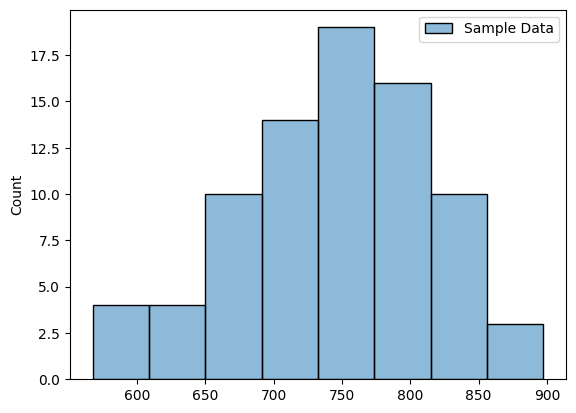

In [97]:
sns.histplot(xl)


<Axes: title={'center': 'Dichtefunktion der Spalte "Sample Data"'}, ylabel='Density'>

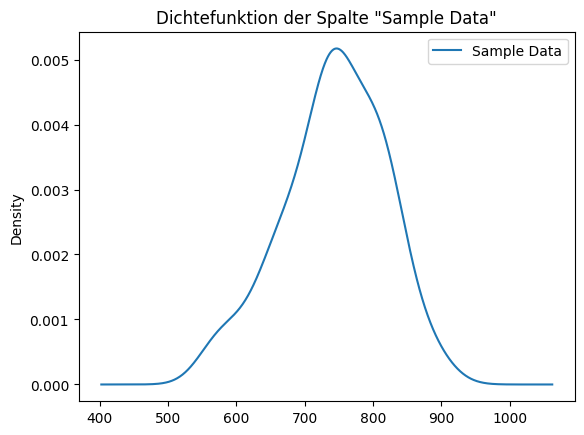

In [98]:
xl.plot(kind='density', title='Dichtefunktion der Spalte "Sample Data"')

<Axes: ylabel='Density'>

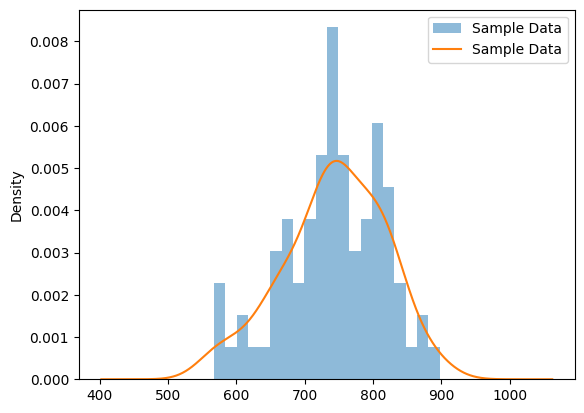

In [99]:
ax = xl.plot(kind='hist', density=True, bins=20, alpha=0.5, label='Histogramm')
xl.plot(kind='density', ax=ax, label='Dichtefunktion')


In [100]:

st_xl = (xl['Sample Data'] - xl['Sample Data'].mean()) / np.std(xl['Sample Data'], ddof=1)
st_xl



0    -2.374169
1    -2.306559
2    -2.306559
3    -2.081191
4    -1.746519
        ...   
75    1.350040
76    1.441314
77    1.780493
78    1.835708
79    2.088121
Name: Sample Data, Length: 80, dtype: float64

<Axes: xlabel='Sample Data', ylabel='Count'>

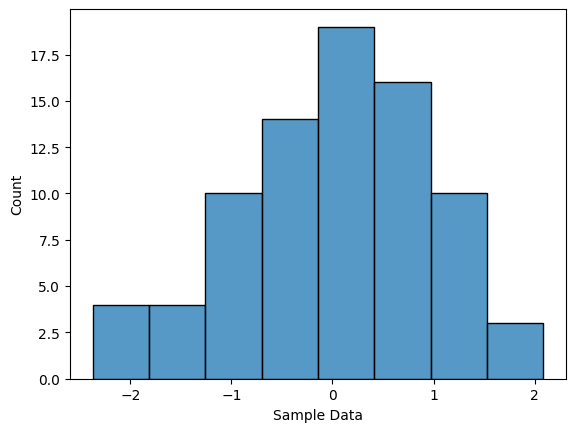

In [101]:
sns.histplot(st_xl)

<Axes: xlabel='Sample Data', ylabel='Density'>

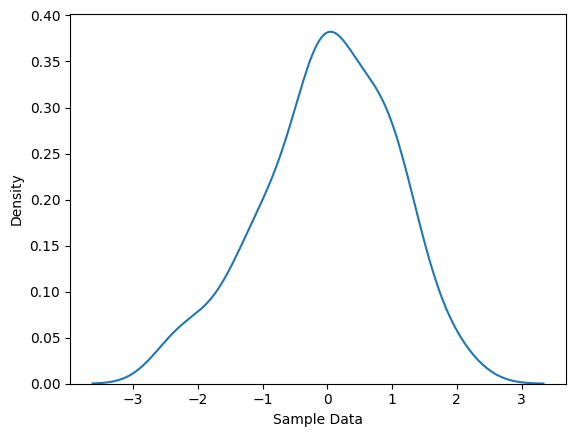

In [102]:
sns.kdeplot(st_xl)

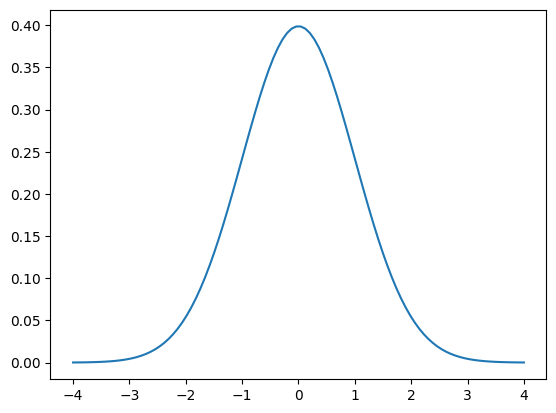

In [103]:
import matplotlib.pyplot as plt
mu = 0
sigma= 1
x = np.linspace(-4,4, 100)
y = scipy.stats.norm.pdf(x, mu, sigma)
plt.plot(x,y)



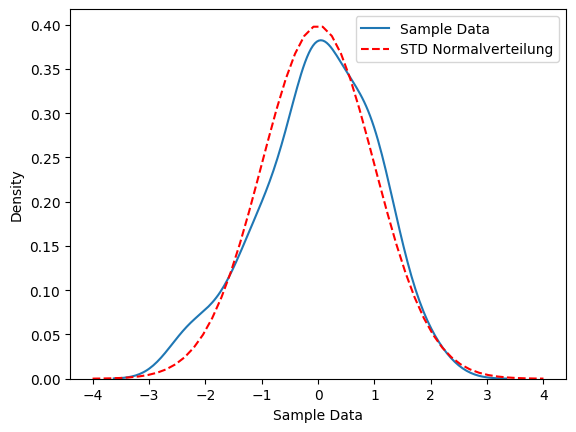

In [106]:
from scipy.stats import norm
x=np.linspace(-4,4, 50)
y= norm.pdf(x, loc=0, scale=1)

sns.kdeplot(st_xl, label = 'Sample Data')
plt.plot(x,y, ls='--', c= 'r', label = 'STD Normalverteilung')
plt.legend()